# Communicate-Data-Finding-Slide-Deck-with-Ford-GoBike-System-Data
## Xi Zhou

## Investigation Overview

> What are the features affecting trip duration the most ( weather , user type )  

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
curDir = os.getcwd()
path = curDir+'/fordgobike/'
text_files = os.listdir(path)
#text_files

# build the frame df by appending each file
file_list = []
print ("reading data... ")
for text_file in text_files:
    #print(text_file)
    filename = path+text_file
    #print(filename)
    df = pd.read_csv(filename)
    file_list.append(df)
df_bike = pd.concat(file_list) 


df_bike_copy =  df_bike.copy()   
print(df_bike_copy.shape)
df_bike_copy

reading data... 
(1863721, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,NaN,NaN,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,1987.0,Male,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,1994.0,Female,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Question 1 : What is the distribution of trip duration?

Text(0,0.5,'Frequency')

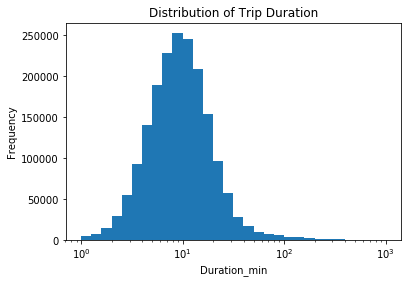

In [7]:
# Let's plot the distribution of trip duration.  
# change the trip duration unit from second to min 
df_bike_copy['duration_min'] = df_bike_copy['duration_sec'] / 60
df_bike_copy.drop('duration_sec' , axis = 1 , inplace = True)

bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_bike_copy , x = 'duration_min' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Duration_min');
plt.xscale('log');
plt.title('Distribution of Trip Duration')
plt.ylabel('Frequency')

> Conclusion 1 : We can see from the distribution , the trip duration of most users is about 10 mins

## (Visualization 2)

> Question 2. Does weather(month) affect the trip duration ?

Text(0,0.5,'Trip Duration(min)')

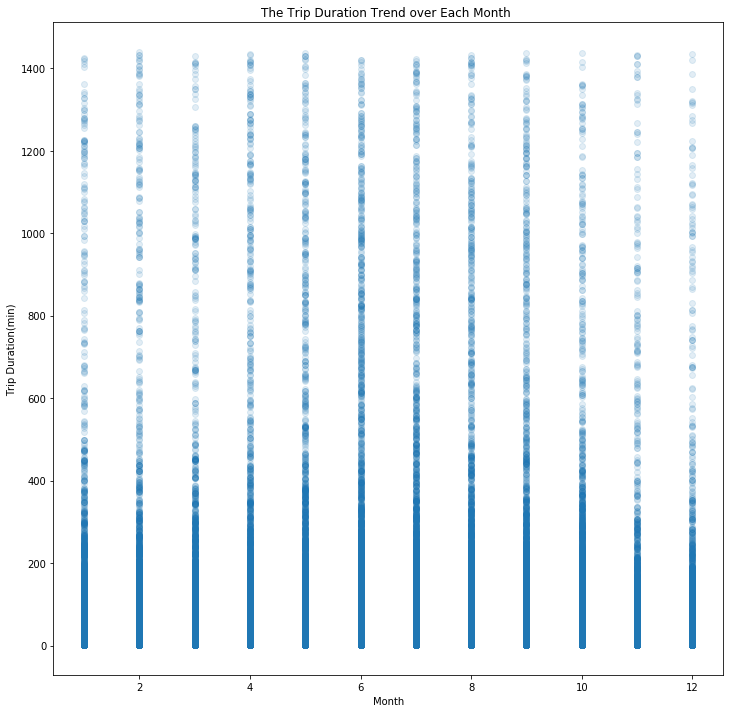

In [8]:
df_bike_copy['month_start'] = pd.DatetimeIndex(df_bike_copy['start_time']).month
# We can check the trip duration over changes over each month.
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df_bike_copy , x = 'month_start' , y = 'duration_min' , alpha = 1/8 )
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)')


> Question 3. Do seasons have a more significant effect the trip duration ?

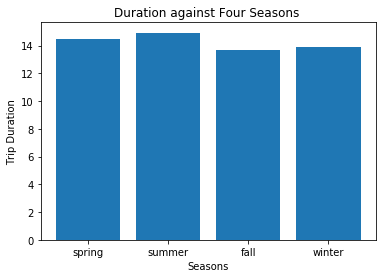

In [10]:
# Create 4 season categories
spring_dur = df_bike_copy.query('month_start in ["3" , "4" , "5"]' ).duration_min.mean ()
summer_dur = df_bike_copy.query('month_start in ["6" , "7" , "8"] ').duration_min.mean()
fall_dur = df_bike_copy.query('month_start in ["9" , "10" , "11"] ').duration_min.mean()
winter_dur = df_bike_copy.query('month_start in ["12" , "1" , "2"]' ).duration_min.mean()

plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

> Conclusion 2 : weather has some affect over the trip duration but the influence is very limited. Summer and Spring have relatively higher trip duration. Fall turns to have the lowest trip duration. After investigation, I found in the fall of 2018 there was a wildfire in California, which caused the worst air quality in San Francisco. It is very likely that people tend to do less outdoor activities due to the pool air quality. 

## (Visualization 3)

Question 4 : Does user type lead to the lower trip duration?

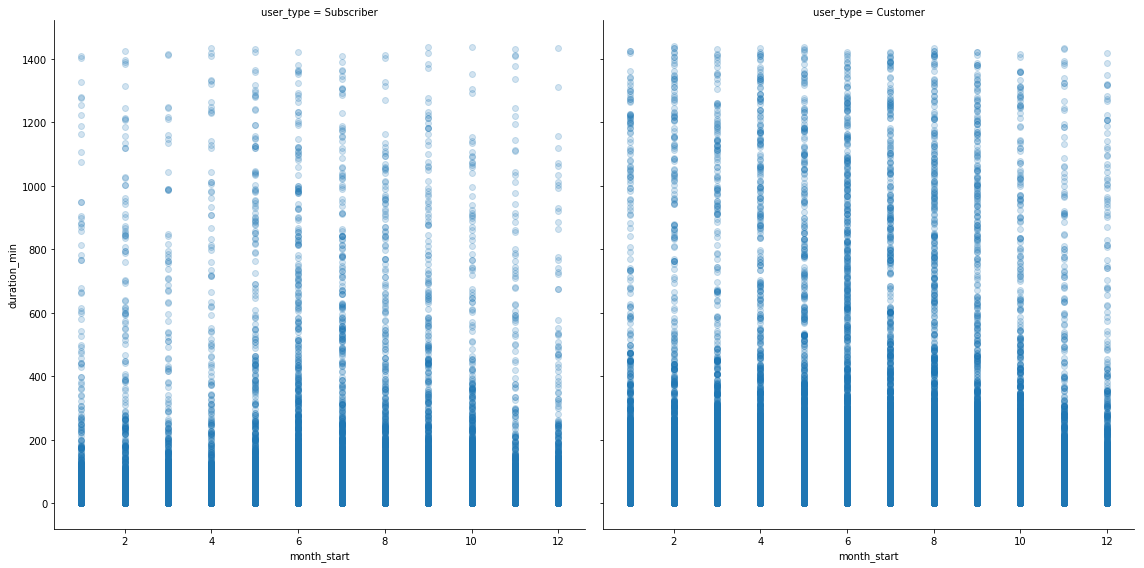

In [22]:
m = sb.FacetGrid(data =  df_bike_copy, col = 'user_type', size = 8, col_wrap = 2)
m.map(sb.regplot, 'month_start', 'duration_min', y_jitter = 0.04, fit_reg = False,scatter_kws = {'alpha' : 1/5});

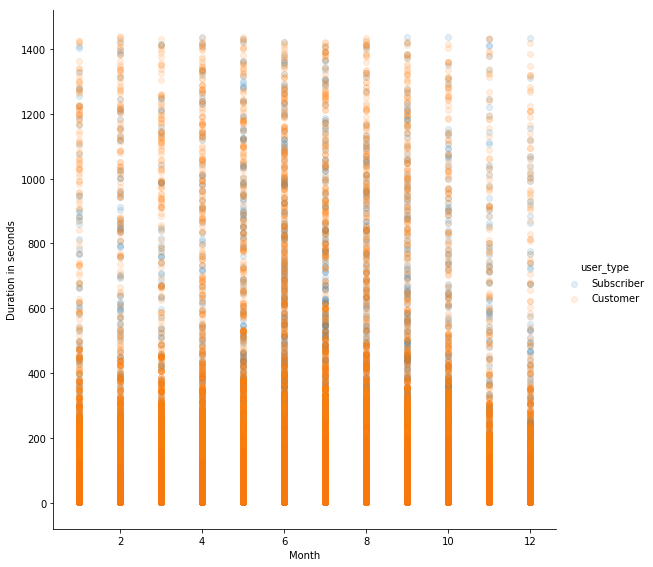

In [18]:
month = sb.FacetGrid(data = df_bike_copy, hue = 'user_type', hue_order = ['Subscriber','Customer'], size = 8)
month.map(plt.scatter, 'month_start','duration_min', alpha = 1/8)
month.add_legend()
plt.xlabel('Month')
plt.ylabel('Duration in seconds');

> Conclusion 3 : There are far more customers than subscribers using the bike sharing service. The subscribers tend to use the service for longer trips( Most blue dots are above 250 mins ) . 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> `jupyter nbconvert Data-Finding-Slide-Deck-with-Bike-Data.ipynb --to slides --post serve`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!